In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Suicide_Detection.csv')

In [3]:
df.sample(5)

,Unnamed: 0,text,class
9484,174678,Share this Things to do:\n\n• Spam social medi...,non-suicide
6516,109411,"Hopes up, and crushed epically.I've been suffe...",suicide
526,178405,im a fucking grown ass man and i feel like a 1...,suicide
6196,227825,i feel emptyi’m just laying here. i’ve felt ti...,suicide
9020,127600,i am dyingplease help me. I cant even explain ...,suicide


In [4]:
df.shape

(30000, 3)

In [5]:
# 1. Data Cleaning
# 2. EDA (Exploratory Data Analysis
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   text        30000 non-null  object
 2   class       30000 non-null  object
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


In [7]:
# drop first column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.sample(5)

,text,class
2647,I’m moving to silent hill Cya west coast time ...,non-suicide
21239,I know she meant this well but... This girl I ...,non-suicide
24736,Question: Do teenagers still watch TV? 19 goin...,non-suicide
15575,Just need some kind thoughtsToday at my house ...,suicide
14651,Are hand pics a thing now? And why lol,non-suicide


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['class'] = encoder.fit_transform(df['class'])

In [11]:
df.head()

,text,class
0,I make no senseAll I can think of is suicide b...,1
1,Best vacation ever So I just went to a beachy ...,0
2,Does anyone here enjoy trading in car soccer o...,0
3,Decode for a cookie! -- . / .-.. .. -.- . / --...,0
4,Thinking of giving up. All my attempts fail to...,1


In [12]:
# checking for missing values
df.isnull().sum()

,0
text,0
class,0


In [13]:
# checking for duplicate values
df.duplicated().sum()

0

In [14]:
df.shape

(30000, 2)

## 2. EDA

In [15]:
df.head()

,text,class
0,I make no senseAll I can think of is suicide b...,1
1,Best vacation ever So I just went to a beachy ...,0
2,Does anyone here enjoy trading in car soccer o...,0
3,Decode for a cookie! -- . / .-.. .. -.- . / --...,0
4,Thinking of giving up. All my attempts fail to...,1


In [16]:
df['class'].value_counts()

,count
class,
1,15000
0,15000


In [17]:
import nltk

In [18]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
# Number of characters in each post
df['num_characters'] = df['text'].apply(len)

In [20]:
df.head()

,text,class,num_characters
0,I make no senseAll I can think of is suicide b...,1,68
1,Best vacation ever So I just went to a beachy ...,0,311
2,Does anyone here enjoy trading in car soccer o...,0,105
3,Decode for a cookie! -- . / .-.. .. -.- . / --...,0,1083
4,Thinking of giving up. All my attempts fail to...,1,686


In [21]:
# Number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,text,class,num_characters,num_words
0,I make no senseAll I can think of is suicide b...,1,68,18
1,Best vacation ever So I just went to a beachy ...,0,311,82
2,Does anyone here enjoy trading in car soccer o...,0,105,24
3,Decode for a cookie! -- . / .-.. .. -.- . / --...,0,1083,466
4,Thinking of giving up. All my attempts fail to...,1,686,149


In [23]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,text,class,num_characters,num_words,num_sentences
0,I make no senseAll I can think of is suicide b...,1,68,18,1
1,Best vacation ever So I just went to a beachy ...,0,311,82,4
2,Does anyone here enjoy trading in car soccer o...,0,105,24,3
3,Decode for a cookie! -- . / .-.. .. -.- . / --...,0,1083,466,69
4,Thinking of giving up. All my attempts fail to...,1,686,149,17


In [25]:
# Statistical analysis of all posts
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,30000.000000,30000.000000,30000.000000
mean,681.631433,153.825233,8.455900
std,1179.266092,292.699708,50.946012
min,4.000000,1.000000,1.000000
25%,138.000000,30.000000,2.000000
50%,312.000000,70.000000,4.000000
75%,794.000000,179.000000,9.000000
max,38785.000000,16430.000000,8209.000000


In [26]:
# Statistical Analysis of suicial posts
df[df['class'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,15000.000000,15000.000000,15000.000000
mean,1025.693933,231.679933,12.708800
std,1329.981446,302.949942,22.182029
min,4.000000,1.000000,1.000000
25%,305.000000,69.000000,4.000000
50%,637.000000,145.000000,8.000000
75%,1257.000000,285.000000,16.000000
max,38738.000000,11620.000000,1936.000000


In [27]:
# Statistical Analysis of non-suicial posts
df[df['class'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,15000.000000,15000.000000,15000.000000
mean,337.568933,75.970533,4.203000
std,880.798109,259.710928,68.285768
min,10.000000,2.000000,1.000000
25%,101.000000,22.000000,1.000000
50%,166.000000,36.000000,2.000000
75%,320.000000,70.250000,4.000000
max,38785.000000,16430.000000,8209.000000


## Z-score method to remove outlier data

In [28]:
upper_limit = df['num_characters'].mean() + 3 * df['num_characters'].std()
lower_limit = df['num_characters'].mean() - 3 * df['num_characters'].std()
print('characters upper limit:', upper_limit)
print('characters lower limit:', lower_limit)

characters upper limit: 4219.429708656855
characters lower limit: -2856.1668419901885


In [29]:
# find the outliers
df.loc[(df['num_characters'] > upper_limit) | (df['num_characters'] < lower_limit)]

,text,class,num_characters,num_words,num_sentences
61,"Please help, I don't know what to do.You will ...",1,4682,1055,39
122,My wife tried to kill herself.I don't think yo...,1,5270,1186,42
295,"I’m Going Through Hell, In Need of Kind Words ...",1,4281,983,53
324,"To suicidal teens, please read my story...Hell...",1,6859,1507,42
355,"Sick of School, Sick of Society, Sick of LifeT...",1,5234,1177,71
...,...,...,...,...,...
29190,"Not seeking attention, Just want to get better...",1,4289,957,68
29426,"The Declaration of Independence, because you c...",0,8261,1519,35
29686,I got bored so I did this PENIS PENIS PENIS PE...,0,7511,1240,2
29688,crush story coming up :D tl;dr i have a crush ...,0,5609,1290,24


In [30]:
new_df = df.loc[(df['num_characters'] < upper_limit) & (df['num_characters'] > lower_limit)]
print('before removing outliers: ', len(df))
print('after removing outliers: ', len(new_df))
print('outliers: ', len(df) - len(new_df))

before removing outliers:  30000
after removing outliers:  29567
outliers:  433


In [31]:
df = new_df

In [32]:
df['class'].value_counts()

,count
class,
0,14941
1,14626


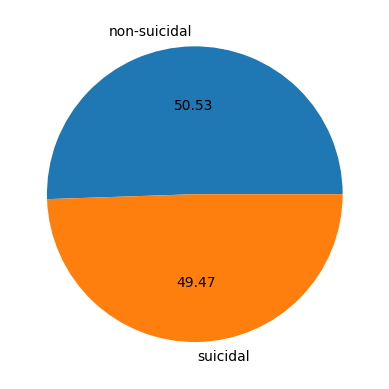

In [33]:
import matplotlib.pyplot as plt
plt.pie(df['class'].value_counts(), labels=['non-suicidal', 'suicidal'], autopct="%0.2f")
plt.show()

In [34]:
# Data is balanced

In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

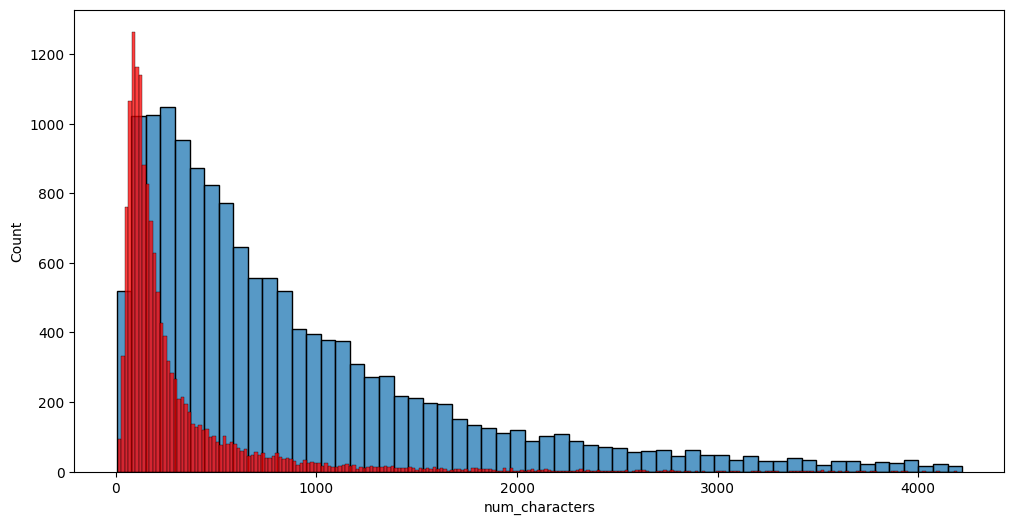

In [36]:
# Histogram plot of number of characters of suicidal(blue) and non-suicidal(red)
plt.figure(figsize=(12,6))
sns.histplot(df[df['class'] == 1]['num_characters'])
sns.histplot(df[df['class'] == 0]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

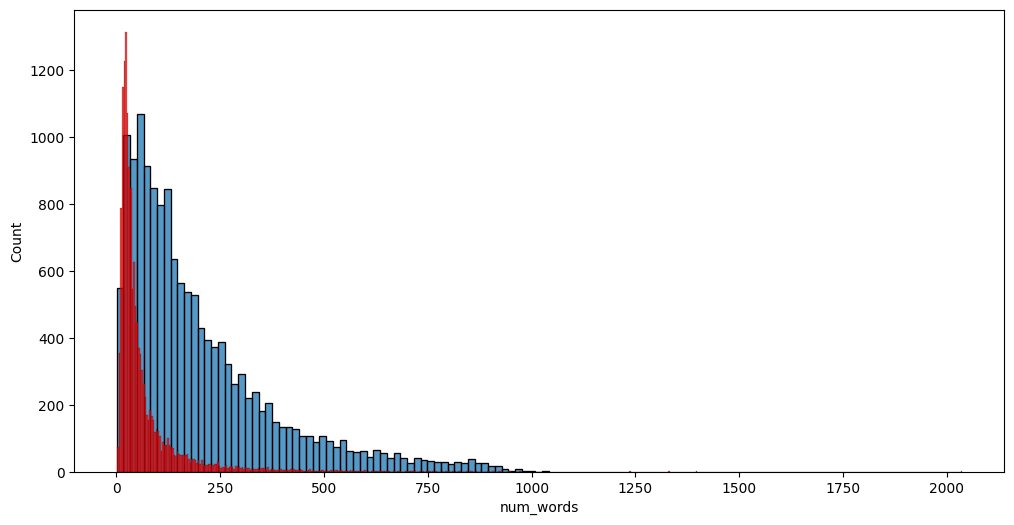

In [37]:
# Histogram plot of number of words of suicidal(blue) and non-suicidal(red)
plt.figure(figsize=(12,6))
sns.histplot(df[df['class'] == 1]['num_words'])
sns.histplot(df[df['class'] == 0]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

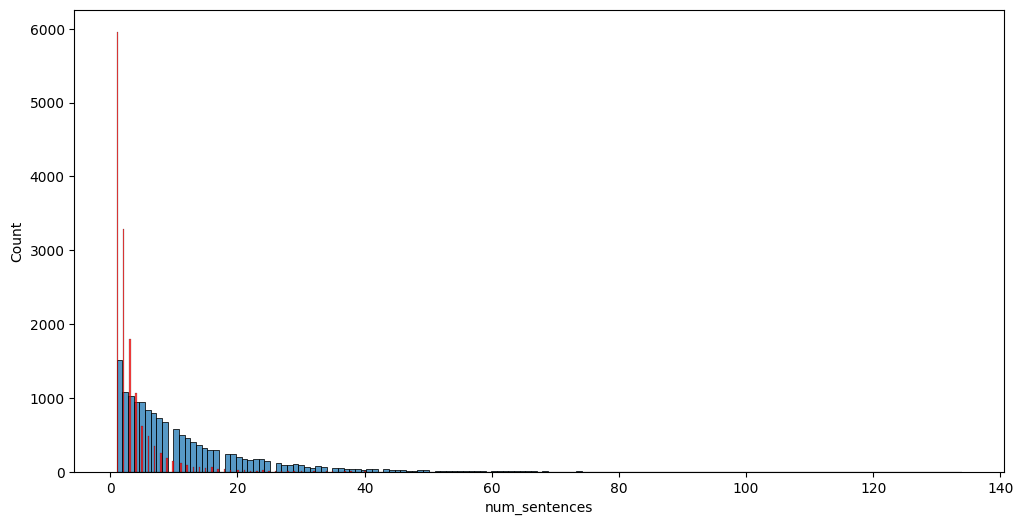

In [38]:
# Histogram plot of number of setences of suicidal(blue) and non-suicidal(red)
plt.figure(figsize=(12,6))
sns.histplot(df[df['class'] == 1]['num_sentences'])
sns.histplot(df[df['class'] == 0]['num_sentences'], color='red')

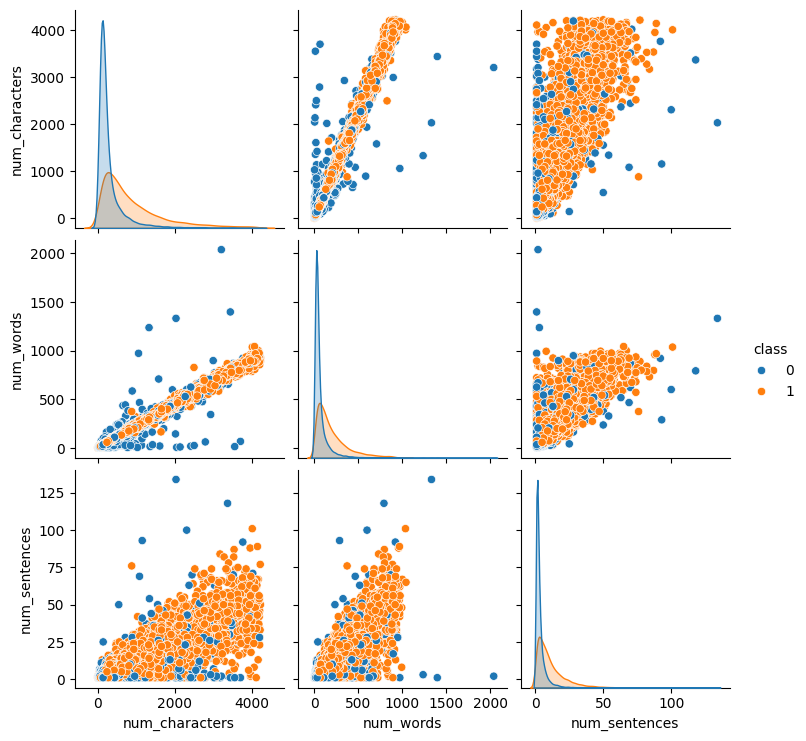

In [39]:
sns.pairplot(df, hue='class')

<Axes: >

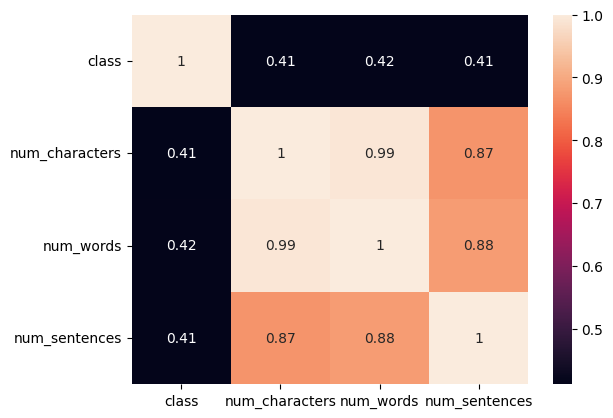

In [40]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation (words which do not help in meaning of sentence like is, the
- Stemming (converting all similar types of words into one like dance, danced, dances to dance)

In [41]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('sleeping')

'sleep'

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,text,class,num_characters,num_words,num_sentences,transformed_text
0,I make no senseAll I can think of is suicide b...,1,68,18,1,make senseal think suicid afraid die
1,Best vacation ever So I just went to a beachy ...,0,311,82,4,best vacat ever went beachi place last day buy...
2,Does anyone here enjoy trading in car soccer o...,0,105,24,3,anyon enjoy trade car soccer oh weird one unde...
3,Decode for a cookie! -- . / .-.. .. -.- . / --...,0,1083,466,69,decod cooki
4,Thinking of giving up. All my attempts fail to...,1,686,149,17,think give attempt fail find one person even t...


In [48]:
# Word Cloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [49]:
suicidal_wc = wc.generate(df[df['class'] == 1]['transformed_text'].str.cat(sep=" "))

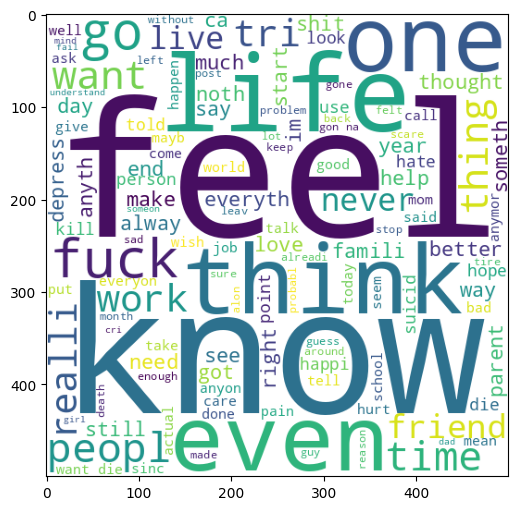

In [50]:
plt.figure(figsize=(15, 6))
plt.imshow(suicidal_wc)

In [51]:
non_suicidal_wc = wc.generate(df[df['class'] == 0]['transformed_text'].str.cat(sep=" "))

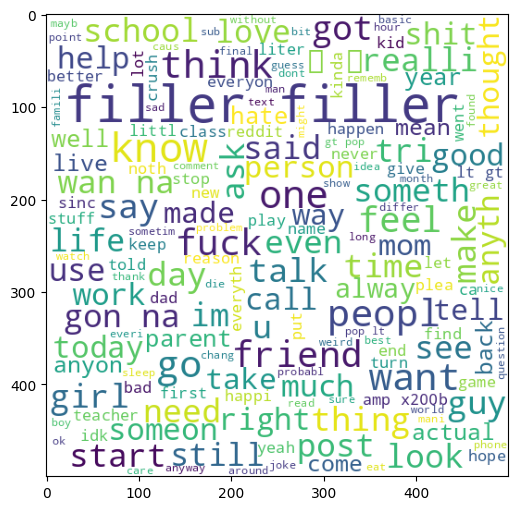

In [52]:
plt.figure(figsize=(15, 6))
plt.imshow(non_suicidal_wc)

In [53]:
# top 30 words in suicidal posts
suicidal_corpus = []
for msg in df[df['class'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        suicidal_corpus.append(word)

In [54]:
len(suicidal_corpus)

1121124

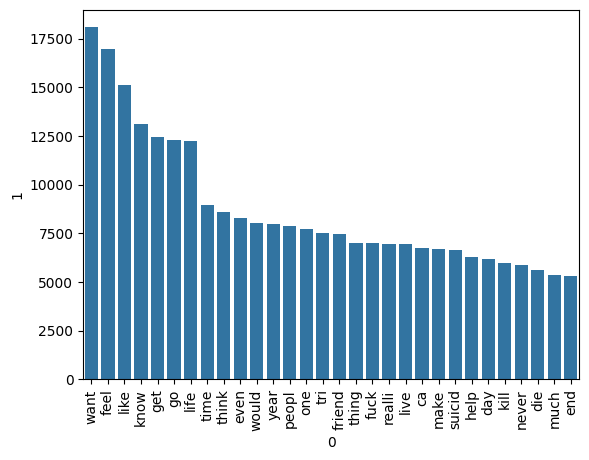

In [55]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(suicidal_corpus).most_common(30))[0], y=pd.DataFrame(Counter(suicidal_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
# top 30 words in non-suicidal posts
non_suicidal_corpus = []
for msg in df[df['class'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        non_suicidal_corpus.append(word)

In [57]:
len(non_suicidal_corpus)

412216

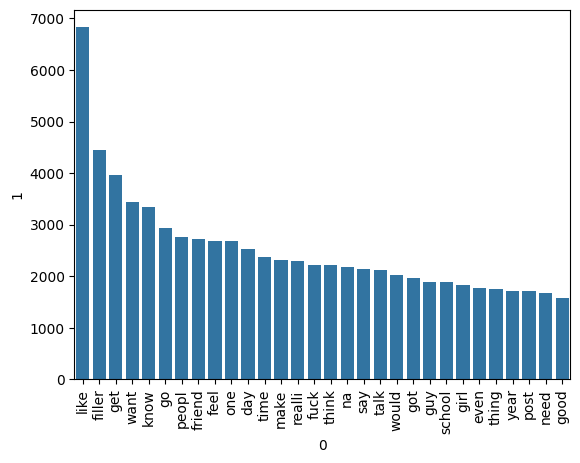

In [58]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(non_suicidal_corpus).most_common(30))[0], y=pd.DataFrame(Counter(non_suicidal_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 5000)

In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
X.shape

(29567, 5000)

In [63]:
y = df['class'].values

In [64]:
y

array([1, 0, 0, ..., 0, 0, 1])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(f1_score(y_test, y_pred1))

0.8276969901927629
[[2606  394]
 [ 625 2289]]
0.8531494595601938
0.8179381811684832


In [70]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(f1_score(y_test, y_pred2))

0.8907676699357457
[[2525  475]
 [ 171 2743]]
0.8523927905531385
0.8946510110893673


In [71]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(f1_score(y_test, y_pred2))

0.7811971592830571
[[2658  342]
 [ 952 1962]]
0.8515625
0.8946510110893673


In [72]:
# tfidf --> MNB

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
xgb = XGBClassifier(n_estimators=50,random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [75]:
clfs = {
    'SVC' : svc,
    'KNN' : knc,
    'NB': mnb,
    'xgb':xgb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt
}

In [76]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy,precision,f1

In [77]:
accuracy_scores = []
precision_scores = []
f1_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("f1_score - ",current_f1)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9181602975989178
Precision -  0.9239357990230286
f1_score -  0.9162629757785468
For  KNN
Accuracy -  0.5160635779506256
Precision -  0.8023255813953488
f1_score -  0.046
For  NB
Accuracy -  0.8907676699357457
Precision -  0.8523927905531385
f1_score -  0.8946510110893673
For  xgb
Accuracy -  0.8909367602299628
Precision -  0.9070685324721923
f1_score -  0.8868619540431503
For  DT
Accuracy -  0.8097734190057491
Precision -  0.8673511293634497
f1_score -  0.7896803140773977
For  LR
Accuracy -  0.9171457558336151
Precision -  0.9279661016949152
f1_score -  0.9147232857640097
For  RF
Accuracy -  0.8809604328711532
Precision -  0.8718034993270525
f1_score -  0.8803941556235134
For  BgC
Accuracy -  0.8726750084545147
Precision -  0.8678924072182499
f1_score -  0.8713040505896428
For  ETC
Accuracy -  0.8872167737571863
Precision -  0.8684814693342079
f1_score -  0.8881435519034043
For  GBDT
Accuracy -  0.8584714237402773
Precision -  0.895017116774439
f1_score -  0.8489

In [78]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'F1_score':f1_scores}).sort_values('F1_score',ascending=False)

In [79]:
performance_df

,Algorithm,Accuracy,Precision,F1_score
0,SVC,0.918160,0.923936,0.916263
5,LR,0.917146,0.927966,0.914723
2,NB,0.890768,0.852393,0.894651
8,ETC,0.887217,0.868481,0.888144
3,xgb,0.890937,0.907069,0.886862
6,RF,0.880960,0.871803,0.880394
7,BgC,0.872675,0.867892,0.871304
9,GBDT,0.858471,0.895017,0.848999
4,DT,0.809773,0.867351,0.789680
1,KNN,0.516064,0.802326,0.046000


In [80]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [81]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.918160
1,LR,Accuracy,0.917146
2,NB,Accuracy,0.890768
3,ETC,Accuracy,0.887217
4,xgb,Accuracy,0.890937
5,RF,Accuracy,0.880960
6,BgC,Accuracy,0.872675
7,GBDT,Accuracy,0.858471
8,DT,Accuracy,0.809773
9,KNN,Accuracy,0.516064


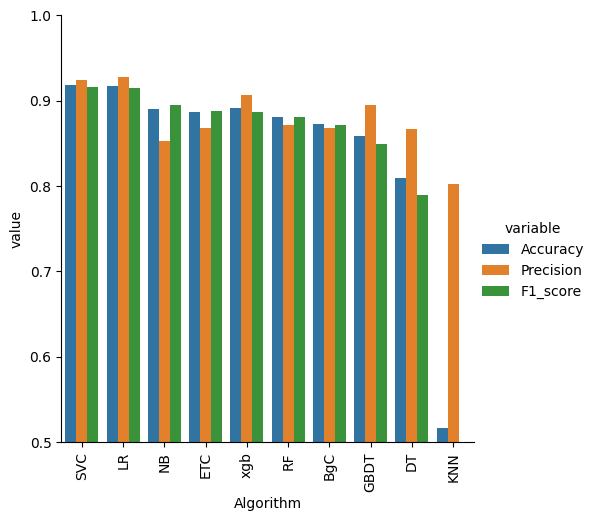

In [83]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [84]:
# Voting Classifier with max features applied
lrc = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB()
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)

from sklearn.ensemble import VotingClassifier

In [85]:
voting = VotingClassifier(estimators=[('lrc', lrc), ('gbdt', gbdt), ('svc', svc)])

In [86]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('lrc',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2)),
                             ('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))])

In [87]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy 0.9179912073047007
Precision 0.9308265342319971
F1 score 0.9154020582592011


In [88]:
from sklearn.ensemble import StackingClassifier

In [89]:
# Applying stacking
base_models=[('lrc', lrc), ('nb', mnb), ('svc', svc)]
meta_model=LogisticRegression(solver='liblinear', penalty='l1')

In [90]:
clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

In [91]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy 0.9201893811295232
Precision 0.9242529534398888
F1 score 0.9185082872928176


In [92]:
# Stacking classifier is the best performing model in terms of F1-score

In [93]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))

In [94]:
nltk.__version__

'3.9.1'

In [95]:
import sklearn
sklearn.__version__

'1.5.2'